In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('../policy_training_and_evaluation/estimation/0107_val_regression_summary.csv') 

In [6]:
df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,overall_agent_reward,mean_phy_info_gains,mean_phy_action_costs,overall_phy_reward,mean_rand_info_gains,mean_rand_action_costs,overall_rand_reward
0,7.796385,../models/dqn_mimic-0107_random_order_search-g...,0107_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.001330,33.100389,-33.101719,-0.00014,46.477027,-46.477167,-0.000305,61.724813,-61.725118
1,0.618293,../models/dqn_mimic-0107_random_order_search-g...,0107_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.001152,34.820441,-34.821593,-0.00014,46.477027,-46.477167,-0.000305,61.724813,-61.725118
2,7.102903,../models/dqn_mimic-0107_random_order_search-g...,0107_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000450,37.038720,-37.039170,-0.00014,46.477027,-46.477167,-0.000305,61.724813,-61.725118
3,0.938453,../models/dqn_mimic-0107_random_order_search-g...,0107_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000636,21.551851,-21.552487,-0.00014,46.477027,-46.477167,-0.000305,61.724813,-61.725118
4,0.216411,../models/dqn_mimic-0107_random_order_search-g...,0107_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000958,25.793027,-25.793985,-0.00014,46.477027,-46.477167,-0.000305,61.724813,-61.725118


### Test loss have no relationship with cost/gain

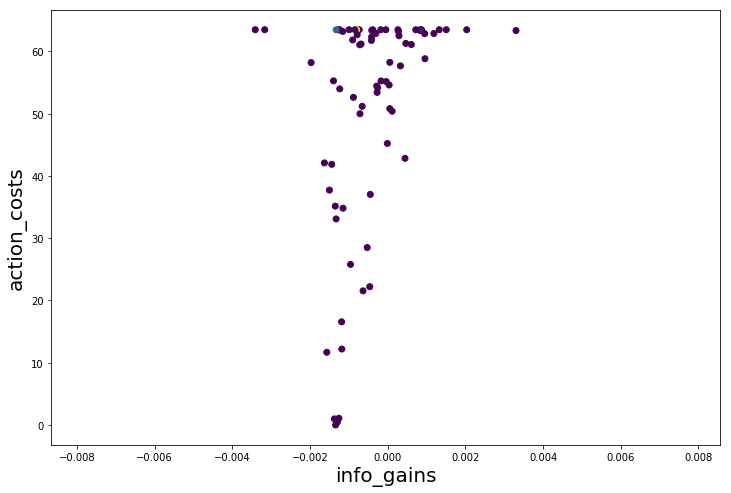

In [7]:
plt.figure(figsize=[12,8])
plt.scatter(df['mean_agent_info_gains'], df['mean_agent_action_costs'], c=df['test_loss'])
plt.xlabel('info_gains', fontsize=20)
plt.ylabel('action_costs', fontsize=20)
plt.show()

### Overall reward is dominated by action cost

In [13]:
selected_df = df[(df['mean_agent_info_gains'] > df['mean_phy_info_gains']) & (df['mean_agent_action_costs'] < df['mean_phy_action_costs']) ]
selected_df

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,overall_agent_reward,mean_phy_info_gains,mean_phy_action_costs,overall_phy_reward,mean_rand_info_gains,mean_rand_action_costs,overall_rand_reward
37,0.794811,../models/dqn_mimic-0107_random_order_search-g...,0107_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,0.000444,42.834375,-42.833931,-0.00014,46.477027,-46.477167,-0.000305,61.724813,-61.725118
67,7.018007,../models/dqn_mimic-0107_random_order_search-g...,0107_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.0005,1,-0.000011,45.217561,-45.217572,-0.00014,46.477027,-46.477167,-0.000305,61.724813,-61.725118


In [14]:
selected_df['policy_dir'].values

array(['../models/dqn_mimic-0107_random_order_search-g1-ac5.0e-04-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-3-1-128-lr-0.0001-reg-0.001-0.7-s-256-5000-i-50-500-3-1',
       '../models/dqn_mimic-0107_random_order_search-g1-ac5.0e-04-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-4-1-256-lr-0.0001-reg-0.0-0.7-s-256-5000-i-50-500-3-1'],
      dtype=object)

## Final plot

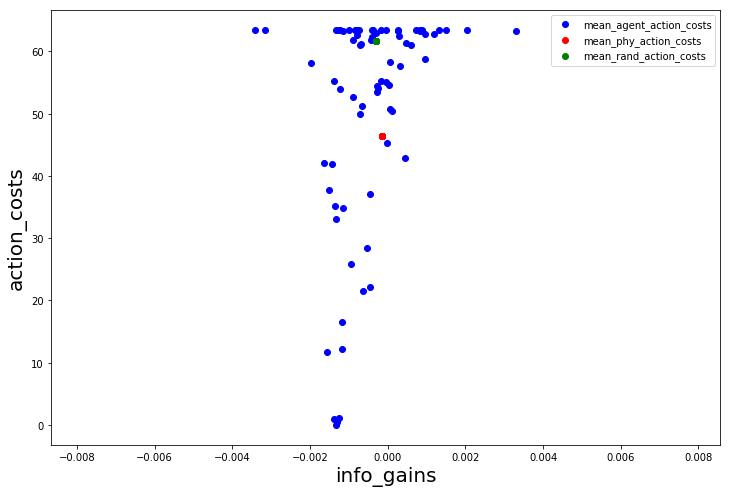

In [15]:
plt.figure(figsize=[12,8])
plt.scatter(df['mean_agent_info_gains'], df['mean_agent_action_costs'], color='b', )
plt.scatter(df['mean_phy_info_gains'], df['mean_phy_action_costs'], color='r')
plt.scatter(df['mean_rand_info_gains'], df['mean_rand_action_costs'], color='g')
plt.legend(loc='best')
plt.xlabel('info_gains', fontsize=20)
plt.ylabel('action_costs', fontsize=20)
plt.show()